In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Setup Spark (jika belum ada)
spark = SparkSession.builder \
    .appName("SimpleAggregationAnalysis") \
    .config("spark.driver.memory", "12g") \
    .getOrCreate()

In [2]:
# Load Members
members_table_path = "data/processed_eda/train_members_grouped.parquet"

print(f"Memuat data dari {members_table_path}...")
members_df = spark.read.parquet(members_table_path)
members_df.cache()
members_df.printSchema()

Memuat data dari data/processed_eda/train_members_grouped.parquet...
root
 |-- msno: string (nullable = true)
 |-- is_churn: integer (nullable = true)
 |-- city: integer (nullable = true)
 |-- bd: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: integer (nullable = true)
 |-- registration_init_time: integer (nullable = true)
 |-- bd_clean: string (nullable = true)
 |-- bd_int: integer (nullable = true)
 |-- age_group: string (nullable = true)



In [13]:
# Load Members
transactions_table_path = "data/processed_eda/full_analysis_transactions.parquet"

print(f"Memuat data dari {transactions_table_path}...")
transactions_df = spark.read.parquet(transactions_table_path)
transactions_df.cache()
transactions_df.printSchema()

Memuat data dari data/processed_eda/full_analysis_transactions.parquet...
root
 |-- msno: string (nullable = true)
 |-- payment_method_id: integer (nullable = true)
 |-- payment_plan_days: integer (nullable = true)
 |-- plan_list_price: integer (nullable = true)
 |-- actual_amount_paid: integer (nullable = true)
 |-- is_auto_renew: integer (nullable = true)
 |-- transaction_date: integer (nullable = true)
 |-- membership_expire_date: integer (nullable = true)
 |-- is_cancel: integer (nullable = true)
 |-- is_churn: integer (nullable = true)
 |-- city: integer (nullable = true)
 |-- bd: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: integer (nullable = true)
 |-- registration_init_time: integer (nullable = true)
 |-- bd_clean: string (nullable = true)
 |-- bd_int: integer (nullable = true)
 |-- age_group: string (nullable = true)



In [14]:
# Load Members
logs_table_path = "data/processed_eda/plot_data_logs.parquet"

print(f"Memuat data dari {logs_table_path}...")
logs_df = spark.read.parquet(logs_table_path)
logs_df.cache()
logs_df.printSchema()

Memuat data dari data/processed_eda/plot_data_logs.parquet...
root
 |-- msno: string (nullable = true)
 |-- is_churn: integer (nullable = true)
 |-- city: integer (nullable = true)
 |-- bd: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: integer (nullable = true)
 |-- registration_init_time: integer (nullable = true)
 |-- bd_clean: string (nullable = true)
 |-- bd_int: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- total_secs_sum: double (nullable = true)
 |-- total_active_days: long (nullable = true)
 |-- total_songs_100: long (nullable = true)
 |-- total_songs_all: long (nullable = true)
 |-- completion_rate: double (nullable = true)
 |-- listening_time_group: string (nullable = true)
 |-- active_days_group: string (nullable = true)
 |-- completion_habit: string (nullable = true)



In [4]:
from pyspark.sql import functions as F

print("--- Analisis Members vs Churn (Final Cleaning) ---")

# --- 4. Agregasi ---

print("\n1. Rata-rata Churn per Gender (Final):")
members_df.groupBy("gender") \
    .agg(
        F.avg("is_churn").alias("churn_rate"), 
        F.count("msno").alias("count")
    ) \
    .orderBy("churn_rate", ascending=False) \
    .show()


print("\n2. Rata-rata Churn per Age (termasuk Unknown):")
members_df.groupBy("bd_clean") \
    .agg(
        F.avg("is_churn").alias("churn_rate"), 
        F.count("msno").alias("count")
    ) \
    .orderBy("churn_rate", ascending=False) \
    .show()


print("\n3. Rata-rata Churn per Kota:")
members_df.groupBy("city") \
    .agg(
        F.avg("is_churn").alias("churn_rate"), 
        F.count("msno").alias("count")
    ) \
    .orderBy("churn_rate", ascending=False) \
    .show()

print("\n4. Rata-rata Churn per Registered Via:")
members_df.groupBy("registered_via") \
    .agg(
        F.avg("is_churn").alias("churn_rate"), 
        F.count("msno").alias("count")
    ) \
    .orderBy("churn_rate", ascending=False) \
    .show()

--- Analisis Members vs Churn (Final Cleaning) ---

1. Rata-rata Churn per Gender (Final):
+-------+-------------------+------+
| gender|         churn_rate| count|
+-------+-------------------+------+
|   male|0.13403975558821254|232722|
| female|0.13208214113409794|209347|
|unknown|0.06277406927752721|640121|
+-------+-------------------+------+


2. Rata-rata Churn per Age (termasuk Unknown):
+--------+-------------------+-----+
|bd_clean|         churn_rate|count|
+--------+-------------------+-----+
|      99| 0.6666666666666666|    3|
|      14| 0.3742857142857143|  350|
|      11| 0.3333333333333333|   12|
|      15| 0.3214936247723133| 1098|
|      13| 0.3157894736842105|   76|
|       6|                0.3|   20|
|      16|0.29217980295566504| 3248|
|      92| 0.2777777777777778|   18|
|      17| 0.2753309916238854| 7402|
|      97|0.26666666666666666|   15|
|      81| 0.2631578947368421|   19|
|      18| 0.2584828393135725|10256|
|       4|               0.25|   12|
|      19

--- Statistik Churn per Kelompok Usia ---
+------------------+-------------------+-----------+
|age_group         |churn_rate         |total_users|
+------------------+-------------------+-----------+
|0-17 (Remaja)     |0.2852169689119171 |12352      |
|18-25 (Muda)      |0.17743119884124364|148435     |
|26-35 (Dewasa)    |0.11011125216264134|186693     |
|36-45 (Paruh Baya)|0.10763369375761596|64831      |
|46-90 (Senior)    |0.09477065857576299|28015      |
|Unknown           |0.06072625976842446|641864     |
+------------------+-------------------+-----------+



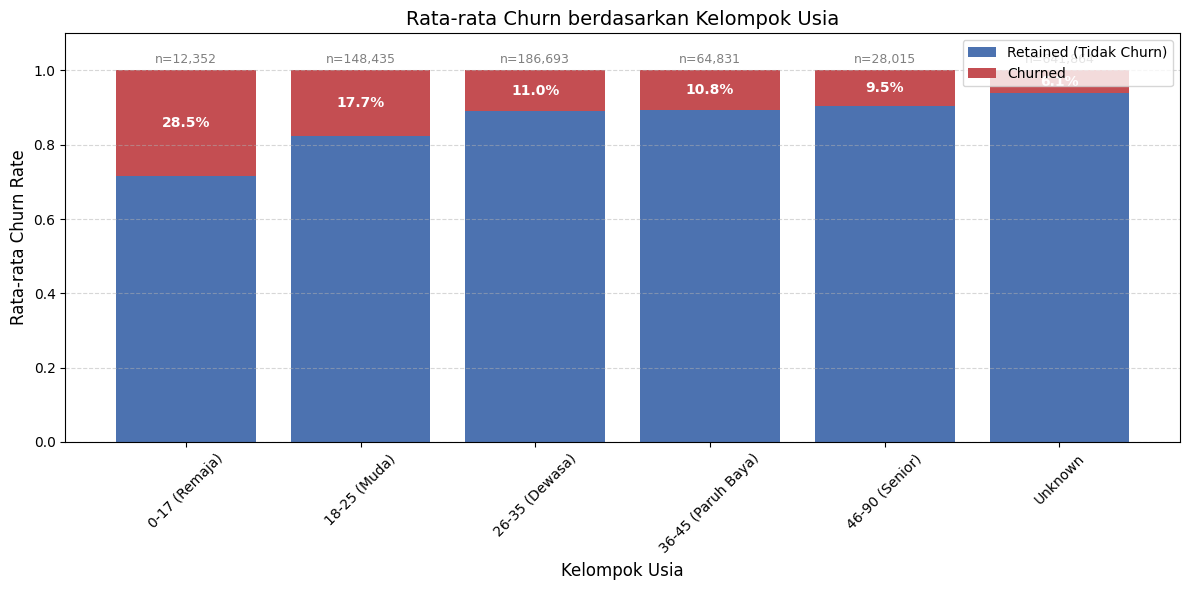

In [7]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Buat Age Grouping (DIPERBAIKI) ---
# Perbaikan: Handle 'unknown' secara eksplisit agar tidak error saat cast ke integer
train_members_age = members_df.withColumn(
    "bd_int", 
    F.when(F.col("bd_clean") == "unknown", None)  # Jika 'unknown', jadikan NULL
     .otherwise(F.col("bd_clean").cast("integer")) # Sisanya (angka string) ubah ke int
)

train_members_grouped = train_members_age.withColumn(
    "age_group",
    F.when((F.col("bd_int") >= 0) & (F.col("bd_int") <= 17), "0-17 (Remaja)")
     .when((F.col("bd_int") >= 18) & (F.col("bd_int") <= 25), "18-25 (Muda)")
     .when((F.col("bd_int") >= 26) & (F.col("bd_int") <= 35), "26-35 (Dewasa)")
     .when((F.col("bd_int") >= 36) & (F.col("bd_int") <= 45), "36-45 (Paruh Baya)")
     .when((F.col("bd_int") >= 46) & (F.col("bd_int") <= 100), "46-90 (Senior)")
     .otherwise("Unknown") # Ini akan menangkap nilai NULL tadi
)

# --- 2. Hitung Churn Rate & Total Count per Group ---
age_churn_stats = train_members_grouped.groupBy("age_group") \
    .agg(
        F.avg("is_churn").alias("churn_rate"),
        F.count("msno").alias("total_users")
    ) \
    .orderBy("age_group")

# Tampilkan tabel hasil
print("--- Statistik Churn per Kelompok Usia ---")
age_churn_stats.show(truncate=False)

# --- 3. Konversi ke Pandas untuk Visualisasi ---
pdf_age = age_churn_stats.toPandas()

# Siapkan data untuk Stacked Bar (Churn vs Retention)
pdf_age['retention_rate'] = 1 - pdf_age['churn_rate']

# --- 4. Plotting Stacked Bar Chart ---
plt.figure(figsize=(12, 6))

# Plot Retention (Bawah - Biru)
p1 = plt.bar(pdf_age['age_group'], pdf_age['retention_rate'], label='Retained (Tidak Churn)', color='#4c72b0')

# Plot Churn (Atas - Merah)
p2 = plt.bar(pdf_age['age_group'], pdf_age['churn_rate'], bottom=pdf_age['retention_rate'], label='Churned', color='#c44e52')

# Tambahkan label persentase di tengah bar churn
for i, row in pdf_age.iterrows():
    # Label untuk Churn
    if row['churn_rate'] > 0.01: # Hanya tampilkan jika > 1% agar rapi
        plt.text(i, row['retention_rate'] + row['churn_rate']/2, 
                 f"{row['churn_rate']:.1%}", 
                 ha='center', va='center', color='white', fontweight='bold')
    
    # Label jumlah user di atas bar
    plt.text(i, 1.02, f"n={row['total_users']:,}", ha='center', fontsize=9, color='gray')

plt.title('Rata-rata Churn berdasarkan Kelompok Usia', fontsize=14)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Rata-rata Churn Rate', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Membuat Plot untuk Gender...


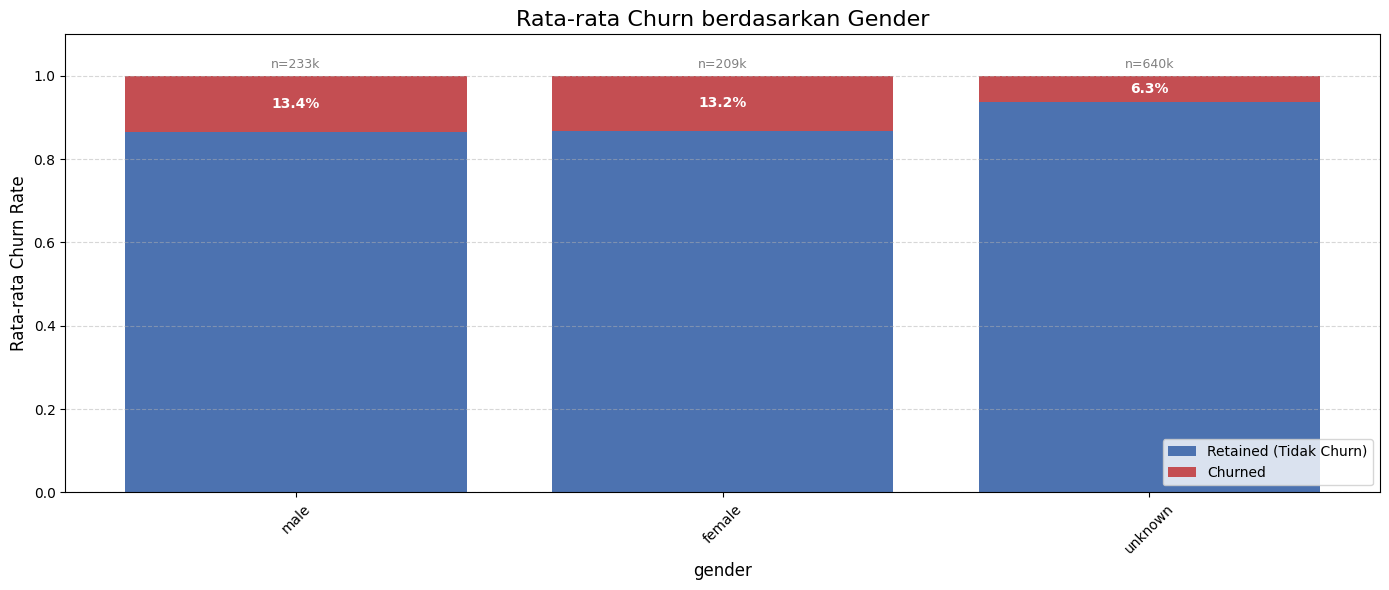

Membuat Plot untuk City...


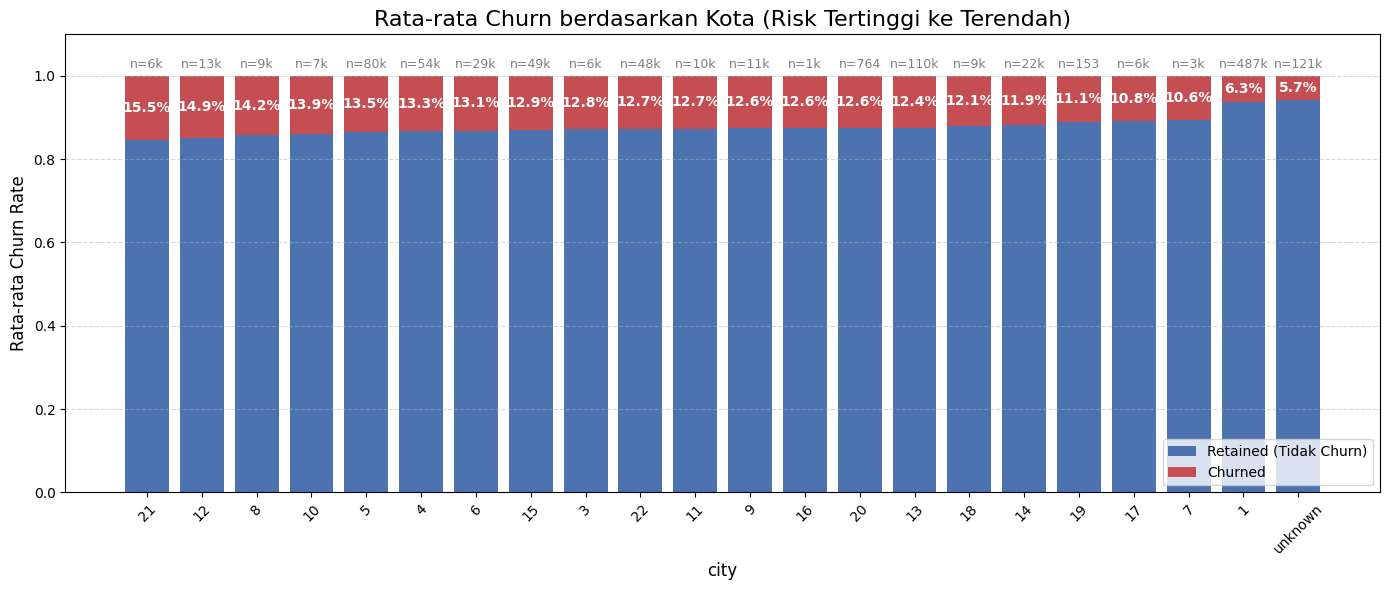

Membuat Plot untuk Registered Via...


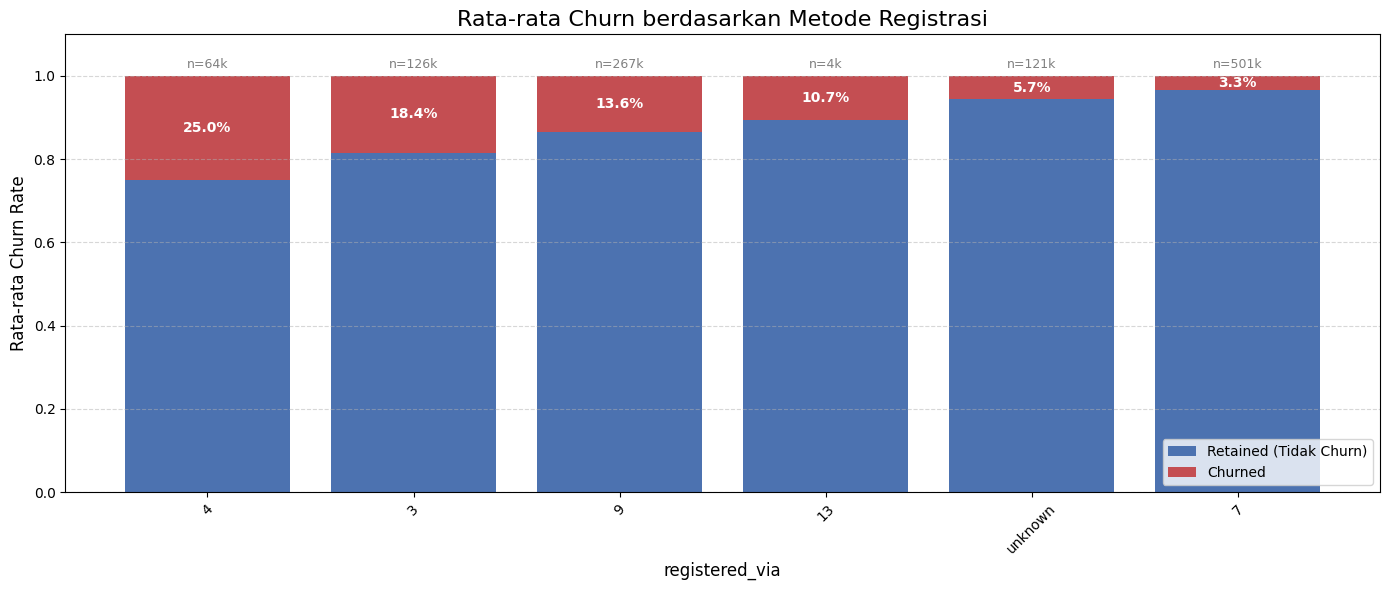

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

def plot_churn_by_category(df, col_name, title, sort_by_risk=True):
    """
    Fungsi untuk membuat Stacked Bar Chart dari DataFrame 'train_members'.
    """
    # 1. Hitung Statistik di Spark
    # Kita cast ke string agar label di plot terbaca sebagai kategori (bukan angka kontinu)
    stats_df = df.withColumn(col_name, F.col(col_name).cast("string")) \
        .fillna('unknown', subset=[col_name]) \
        .groupBy(col_name) \
        .agg(
            F.avg("is_churn").alias("churn_rate"),
            F.count("msno").alias("total_users")
        )
    
    # Urutkan berdasarkan Churn Rate tertinggi jika diminta (untuk City/Registered Via)
    if sort_by_risk:
        stats_df = stats_df.orderBy(F.desc("churn_rate"))
    
    # 2. Konversi ke Pandas
    pdf = stats_df.toPandas()
    
    # Hitung Retention Rate
    pdf['retention_rate'] = 1 - pdf['churn_rate']

    # 3. Plotting
    plt.figure(figsize=(14, 6))
    
    # Bar Retention (Bawah - Biru)
    p1 = plt.bar(pdf[col_name], pdf['retention_rate'], label='Retained (Tidak Churn)', color='#4c72b0')
    
    # Bar Churn (Atas - Merah)
    p2 = plt.bar(pdf[col_name], pdf['churn_rate'], bottom=pdf['retention_rate'], label='Churned', color='#c44e52')
    
    # Tambahkan label data
    for i, row in pdf.iterrows():
        # Label Persentase Churn
        # Hanya tampilkan jika barnya cukup tinggi untuk tulisan (> 2%)
        if row['churn_rate'] > 0.02:
            plt.text(i, row['retention_rate'] + row['churn_rate']/2, 
                     f"{row['churn_rate']:.1%}", 
                     ha='center', va='center', color='white', fontweight='bold', fontsize=10)
        
        # Label Jumlah User (di atas bar)
        count_label = f"n={row['total_users']/1000:.0f}k" if row['total_users'] > 1000 else f"n={row['total_users']}"
        plt.text(i, 1.02, count_label, ha='center', fontsize=9, color='gray')

    plt.title(title, fontsize=16)
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel('Rata-rata Churn Rate', fontsize=12)
    plt.ylim(0, 1.1) # Ruang untuk label n
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- EKSEKUSI (Menggunakan train_members) ---

# 1. Gender
print("Membuat Plot untuk Gender...")
plot_churn_by_category(members_df, "gender", "Rata-rata Churn berdasarkan Gender")

# 2. City (Diurutkan dari Risk Tertinggi)
print("Membuat Plot untuk City...")
plot_churn_by_category(members_df, "city", "Rata-rata Churn berdasarkan Kota (Risk Tertinggi ke Terendah)")

# 3. Registered Via (Diurutkan dari Risk Tertinggi)
print("Membuat Plot untuk Registered Via...")
plot_churn_by_category(members_df, "registered_via", "Rata-rata Churn berdasarkan Metode Registrasi")

Sedang memproses: Heatmap Risiko Churn: Metode Pembayaran vs Kelompok Usia...


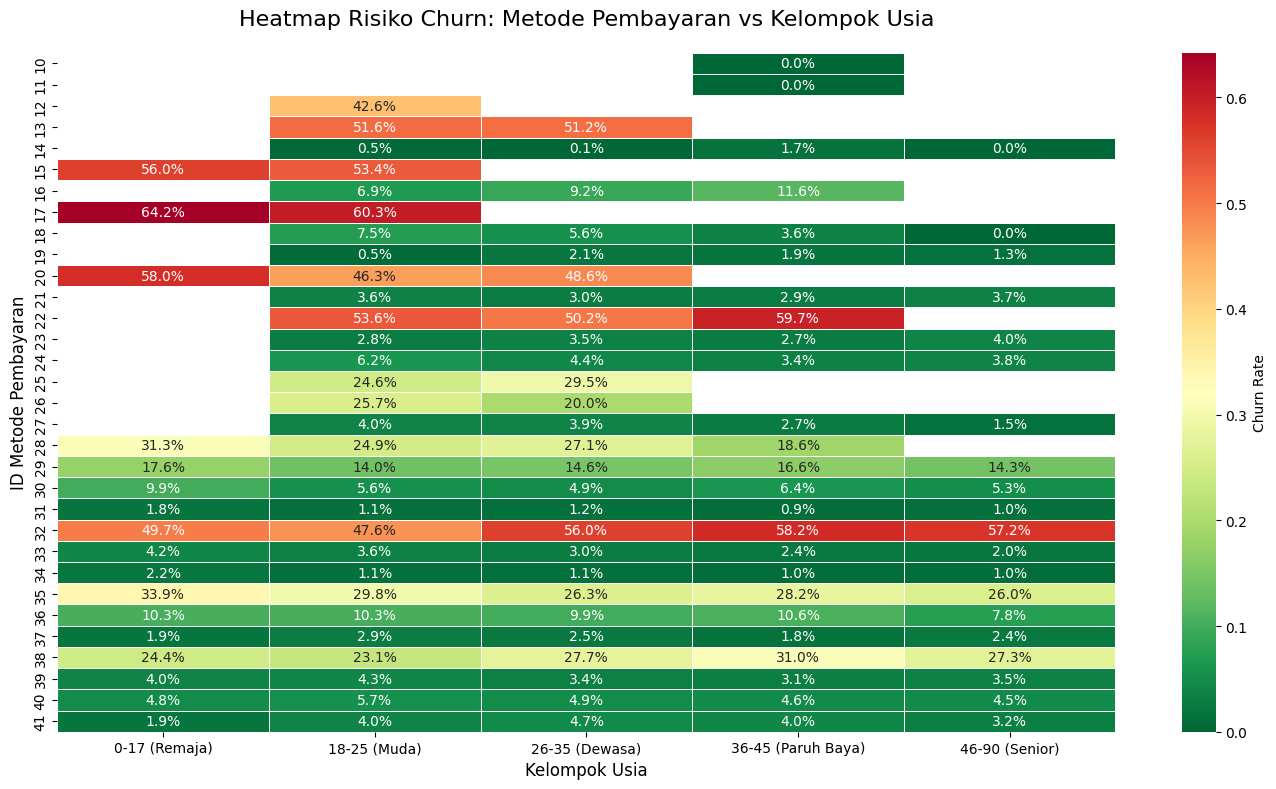

Sedang memproses: Heatmap Risiko: Auto Renew vs Kelompok Usia...


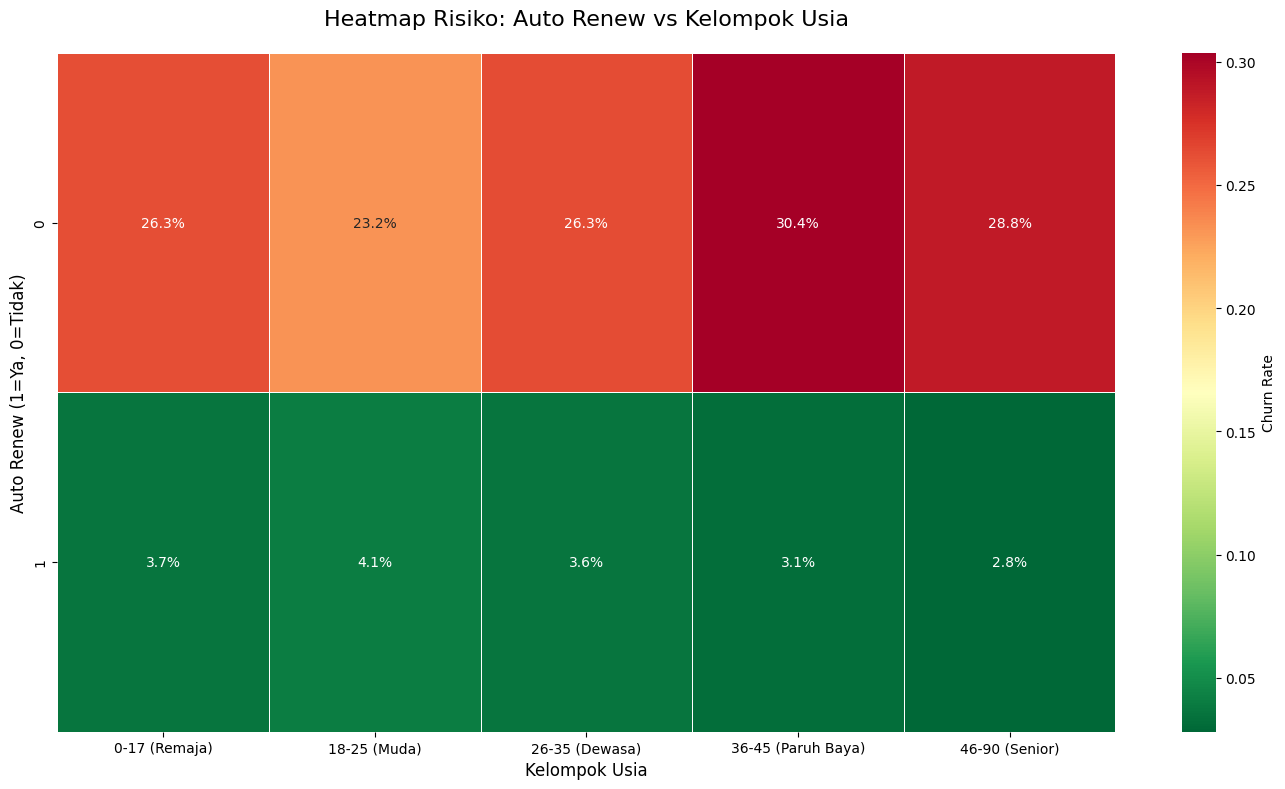

Sedang memproses: Heatmap Risiko: Pembatalan vs Kelompok Usia...


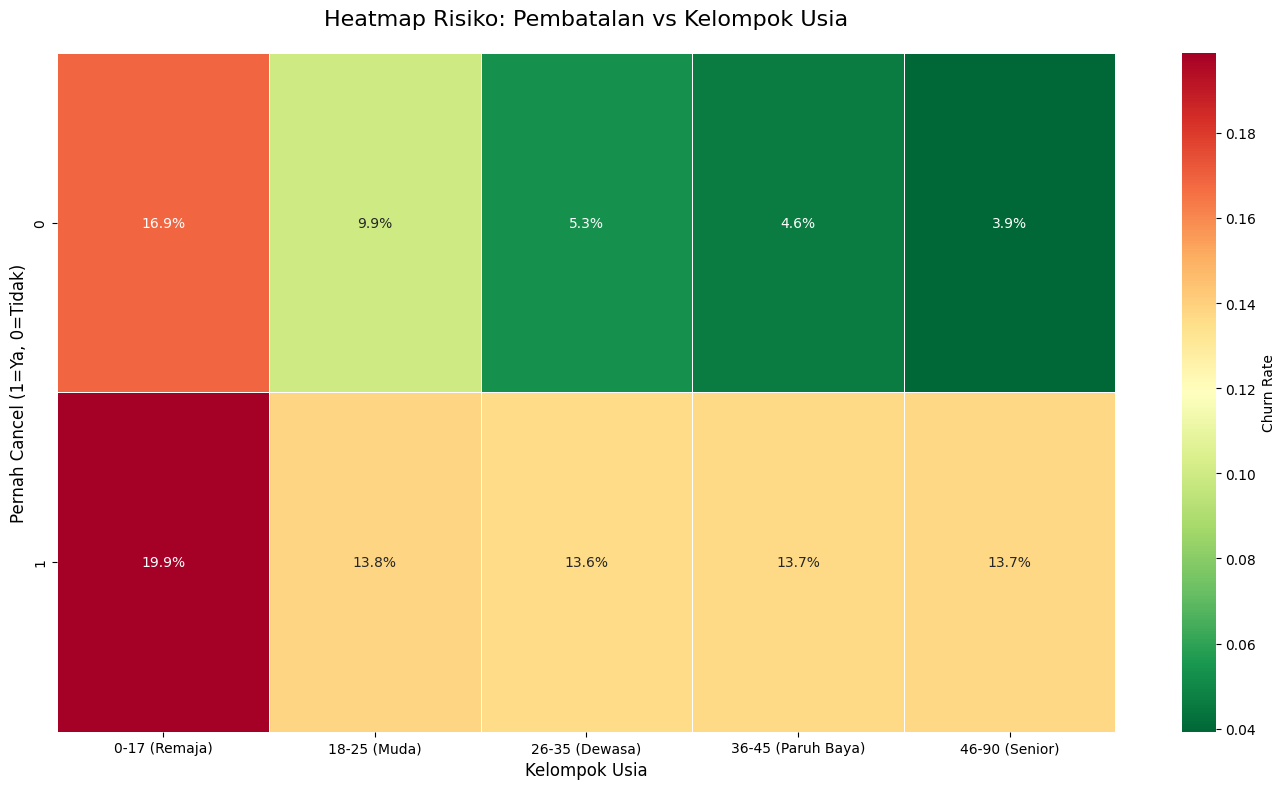

Melakukan Binning untuk Fitur Numerik...
Sedang memproses: Heatmap Risiko: Durasi Paket vs Kelompok Usia...


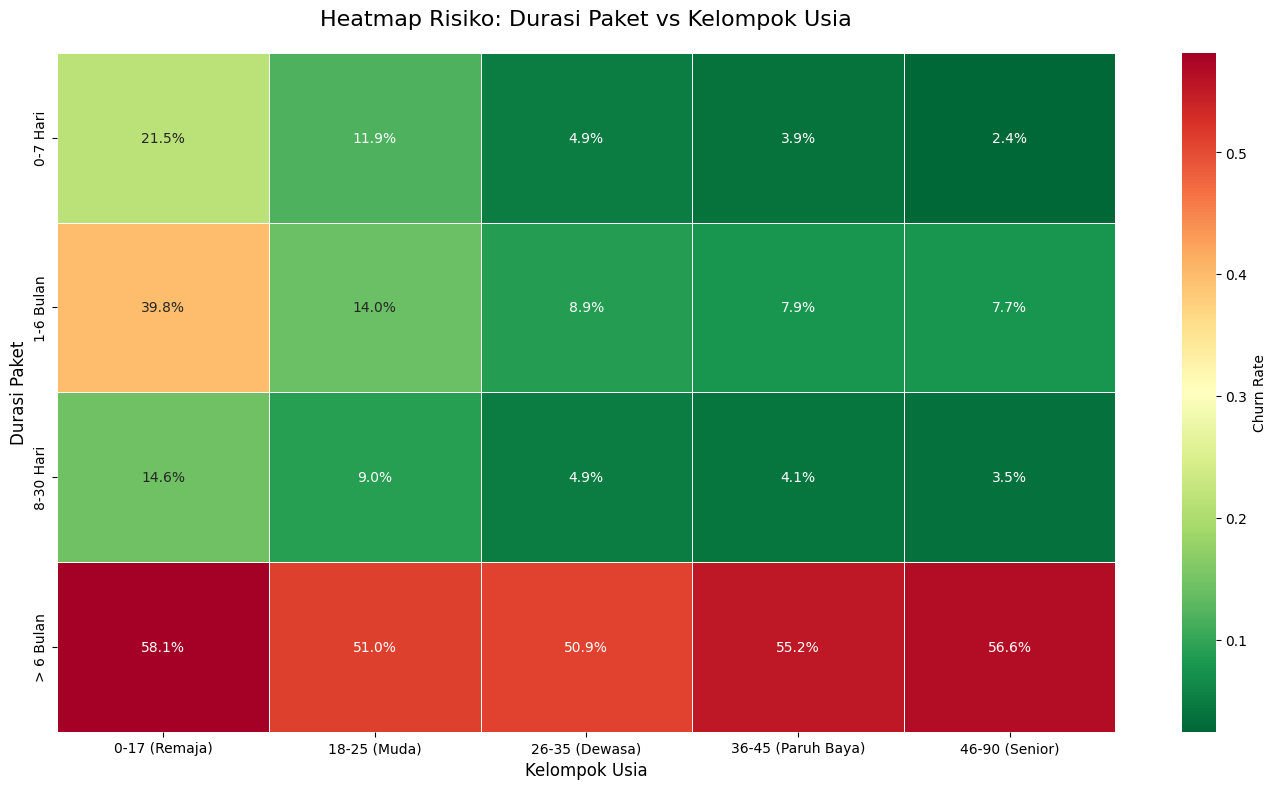

Sedang memproses: Heatmap Risiko: Harga Bayar vs Kelompok Usia...


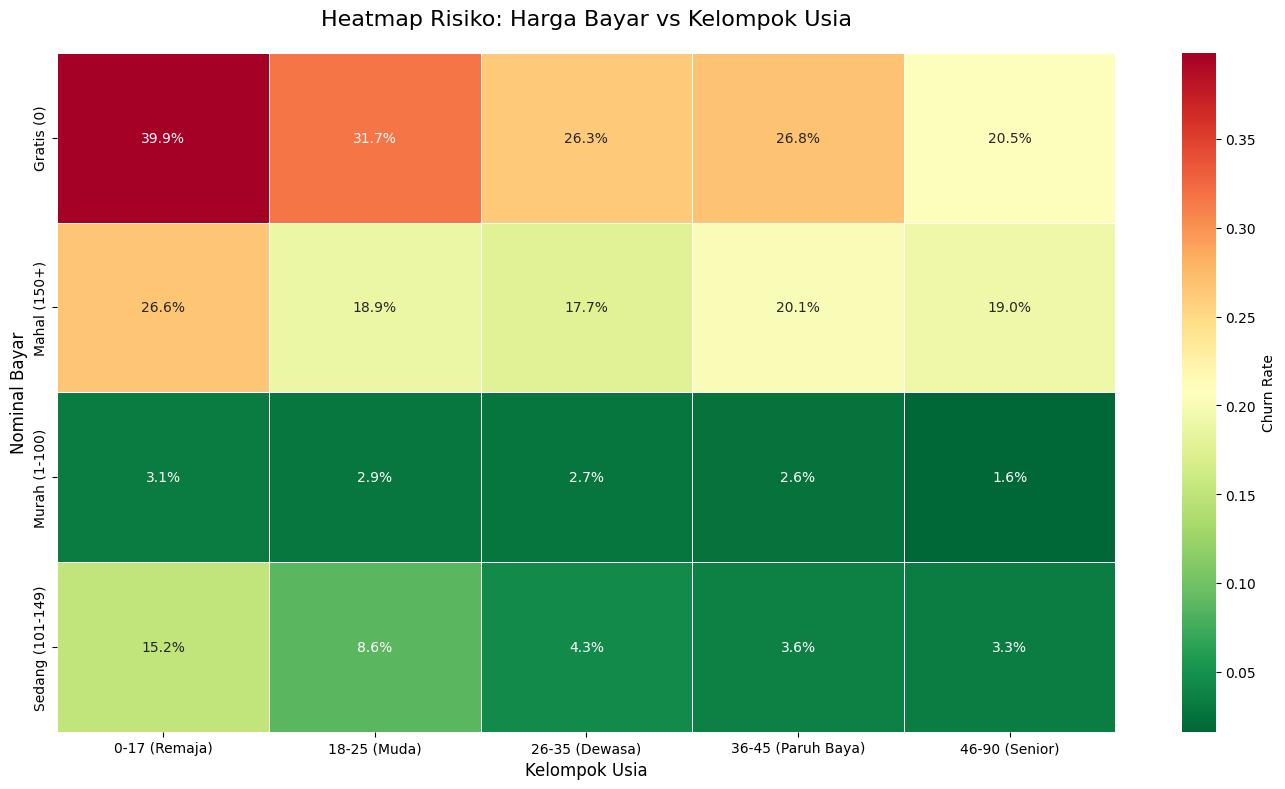

Semua visualisasi selesai!


In [12]:
plot_data = transactions_df.filter(
    (F.col("is_churn").isNotNull()) & 
    (F.col("age_group") != "unknown") 
)
# --- FUNGSI PEMBUAT HEATMAP (Agar kode lebih rapi & tidak berulang) ---
def create_churn_heatmap(df, y_col, title, filename, y_label):
    print(f"Sedang memproses: {title}...")
    
    # Agregasi di Spark
    # Kita filter count > 500 agar heatmap tidak terlalu 'bolong' untuk Payment Method
    stats = df.groupBy("age_group", y_col) \
        .agg(
            F.avg("is_churn").alias("churn_rate"),
            F.count("msno").alias("count")
        ) \
        .filter(F.col("count") > 500) 

    # Konversi ke Pandas
    pdf_viz = stats.toPandas()

    # Pivot Data
    heatmap_viz = pdf_viz.pivot(index=y_col, columns="age_group", values="churn_rate")

    # Urutkan Age Group
    age_order = ["0-17 (Remaja)", "18-25 (Muda)", "26-35 (Dewasa)", "36-45 (Paruh Baya)", "46-90 (Senior)"]
    heatmap_viz = heatmap_viz.reindex(columns=age_order)
    
    # Sort Index Y (biar rapi urutannya, misal 0 di bawah, 1 di atas)
    # Khusus Payment Method, kita sort berdasarkan index-nya (ID metode)
    heatmap_viz = heatmap_viz.sort_index(ascending=True)

    # Plotting
    plt.figure(figsize=(14, 8)) # Ukuran sedikit diperbesar agar label jelas
    sns.heatmap(
        heatmap_viz, 
        annot=True, 
        fmt=".1%", 
        cmap="RdYlGn_r", # Merah = Bahaya
        linewidths=.5,
        cbar_kws={'label': 'Churn Rate'}
    )
    plt.title(title, fontsize=16, pad=20)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel("Kelompok Usia", fontsize=12)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# --- 7. ANALISIS FITUR KATEGORIKAL ---

# Heatmap 1: Payment Method (Ini yang Anda minta tambahkan)
create_churn_heatmap(
    plot_data, 
    "payment_method_id", 
    "Heatmap Risiko Churn: Metode Pembayaran vs Kelompok Usia", 
    "heatmap_payment_age.png",
    "ID Metode Pembayaran"
)

# Heatmap 2: Auto Renew (0 vs 1)
create_churn_heatmap(
    plot_data, 
    "is_auto_renew", 
    "Heatmap Risiko: Auto Renew vs Kelompok Usia", 
    "heatmap_autorenew_age.png",
    "Auto Renew (1=Ya, 0=Tidak)"
)

# Heatmap 3: Is Cancel (0 vs 1)
create_churn_heatmap(
    plot_data, 
    "is_cancel", 
    "Heatmap Risiko: Pembatalan vs Kelompok Usia", 
    "heatmap_cancel_age.png",
    "Pernah Cancel (1=Ya, 0=Tidak)"
)


# --- 8. ANALISIS NUMERIK (DENGAN BINNING/PENGELOMPOKAN) ---
# Kita harus mengelompokkan hari dan harga agar heatmap tidak berantakan

print("Melakukan Binning untuk Fitur Numerik...")

# Buat kelompok untuk Payment Plan Days & Amount Paid
plot_data_binned = plot_data.withColumn(
    "plan_days_group",
    F.when(F.col("payment_plan_days") <= 7, "0-7 Hari")
     .when((F.col("payment_plan_days") > 7) & (F.col("payment_plan_days") <= 30), "8-30 Hari")
     .when((F.col("payment_plan_days") > 30) & (F.col("payment_plan_days") <= 180), "1-6 Bulan")
     .otherwise("> 6 Bulan")
).withColumn(
    "amount_paid_group",
    F.when(F.col("actual_amount_paid") == 0, "Gratis (0)")
     .when((F.col("actual_amount_paid") > 0) & (F.col("actual_amount_paid") <= 100), "Murah (1-100)")
     .when((F.col("actual_amount_paid") > 100) & (F.col("actual_amount_paid") <= 149), "Sedang (101-149)")
     .otherwise("Mahal (150+)")
)

# Heatmap 4: Payment Plan Days
create_churn_heatmap(
    plot_data_binned, 
    "plan_days_group", 
    "Heatmap Risiko: Durasi Paket vs Kelompok Usia", 
    "heatmap_plandays_age.png",
    "Durasi Paket"
)

# Heatmap 5: Actual Amount Paid
create_churn_heatmap(
    plot_data_binned, 
    "amount_paid_group", 
    "Heatmap Risiko: Harga Bayar vs Kelompok Usia", 
    "heatmap_amount_age.png",
    "Nominal Bayar"
)

print("Semua visualisasi selesai!")

In [16]:
logs_df.printSchema()

root
 |-- msno: string (nullable = true)
 |-- is_churn: integer (nullable = true)
 |-- city: integer (nullable = true)
 |-- bd: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: integer (nullable = true)
 |-- registration_init_time: integer (nullable = true)
 |-- bd_clean: string (nullable = true)
 |-- bd_int: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- total_secs_sum: double (nullable = true)
 |-- total_active_days: long (nullable = true)
 |-- total_songs_100: long (nullable = true)
 |-- total_songs_all: long (nullable = true)
 |-- completion_rate: double (nullable = true)
 |-- listening_time_group: string (nullable = true)
 |-- active_days_group: string (nullable = true)
 |-- completion_habit: string (nullable = true)



Memulai Analisis User Logs x Demografi...
Menggabungkan Logs dengan Demografi...
Melakukan Binning untuk Fitur Logs...
Sedang memproses: Heatmap Risiko: Total Waktu Dengar vs Kelompok Usia...


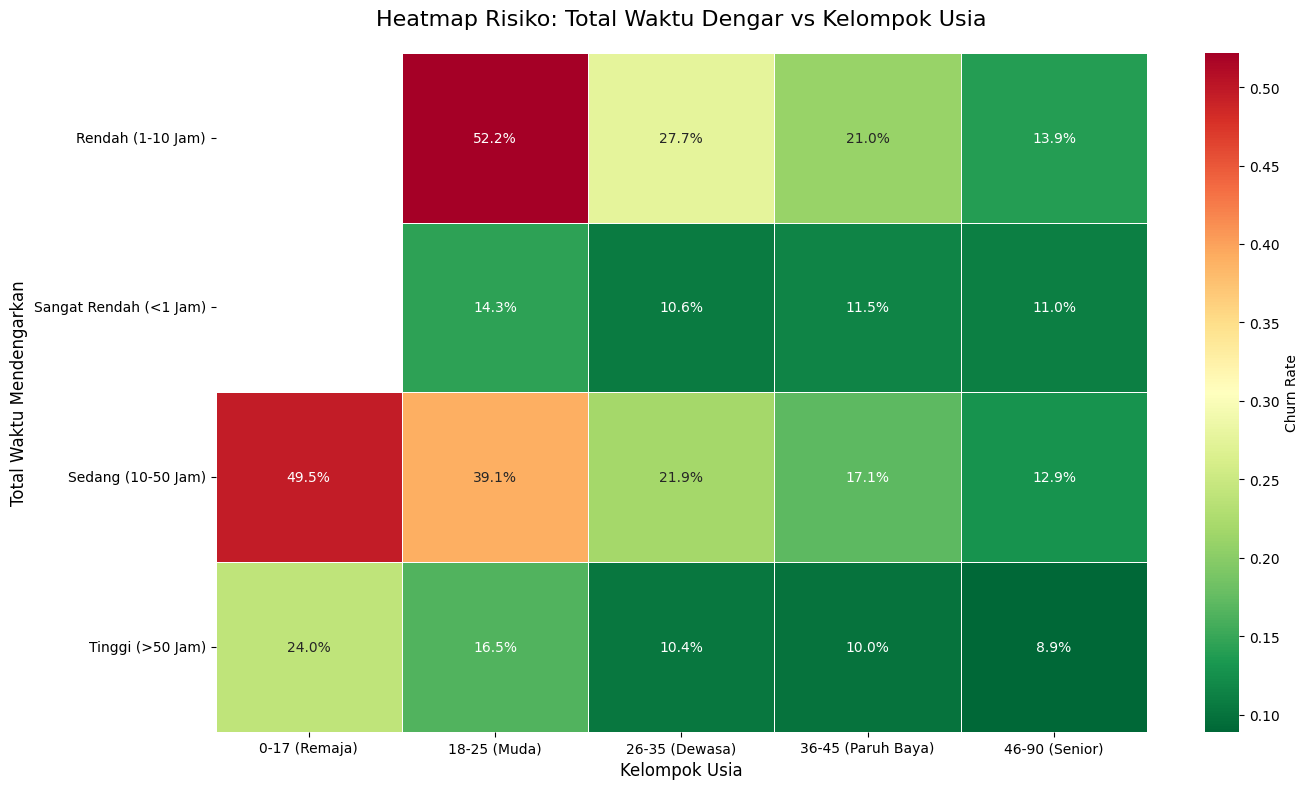

Sedang memproses: Heatmap Risiko: Keaktifan User vs Kelompok Usia...


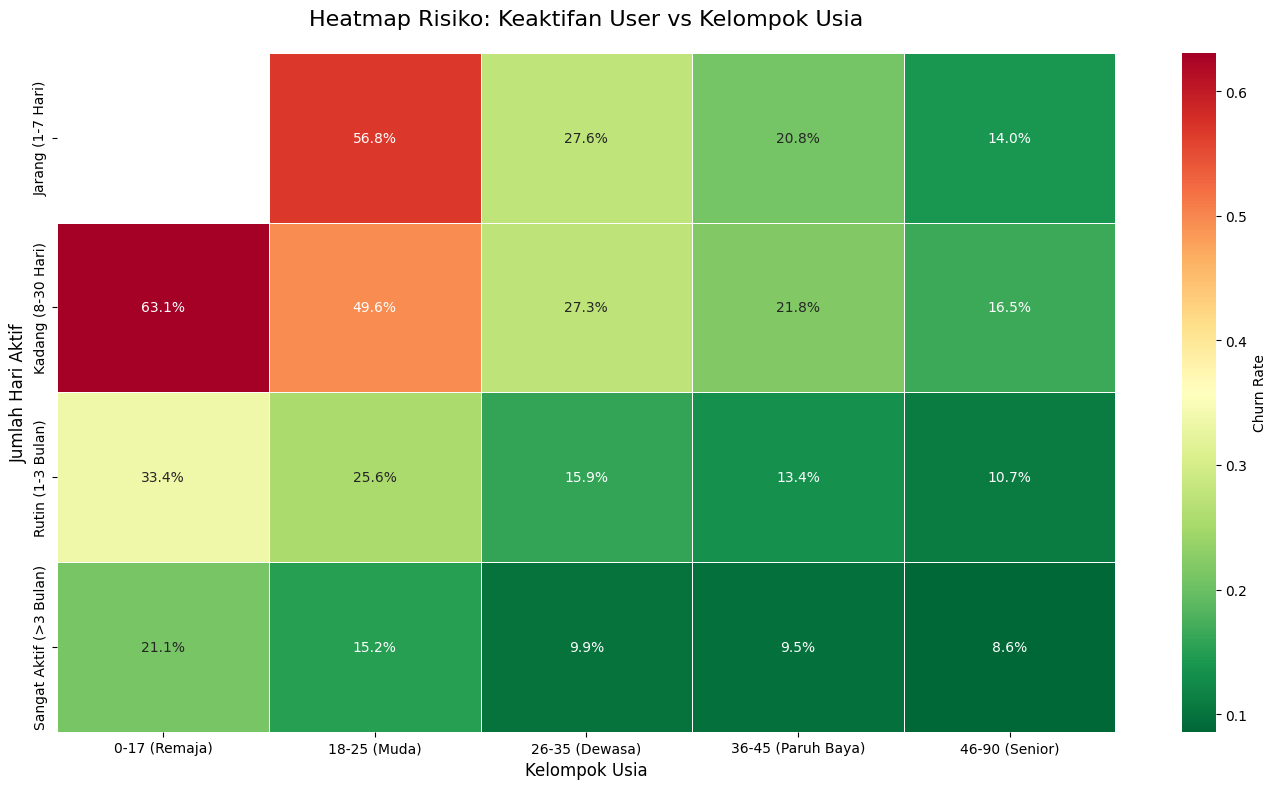

Sedang memproses: Heatmap Risiko: Kebiasaan Dengar (Skip vs Full) vs Usia...


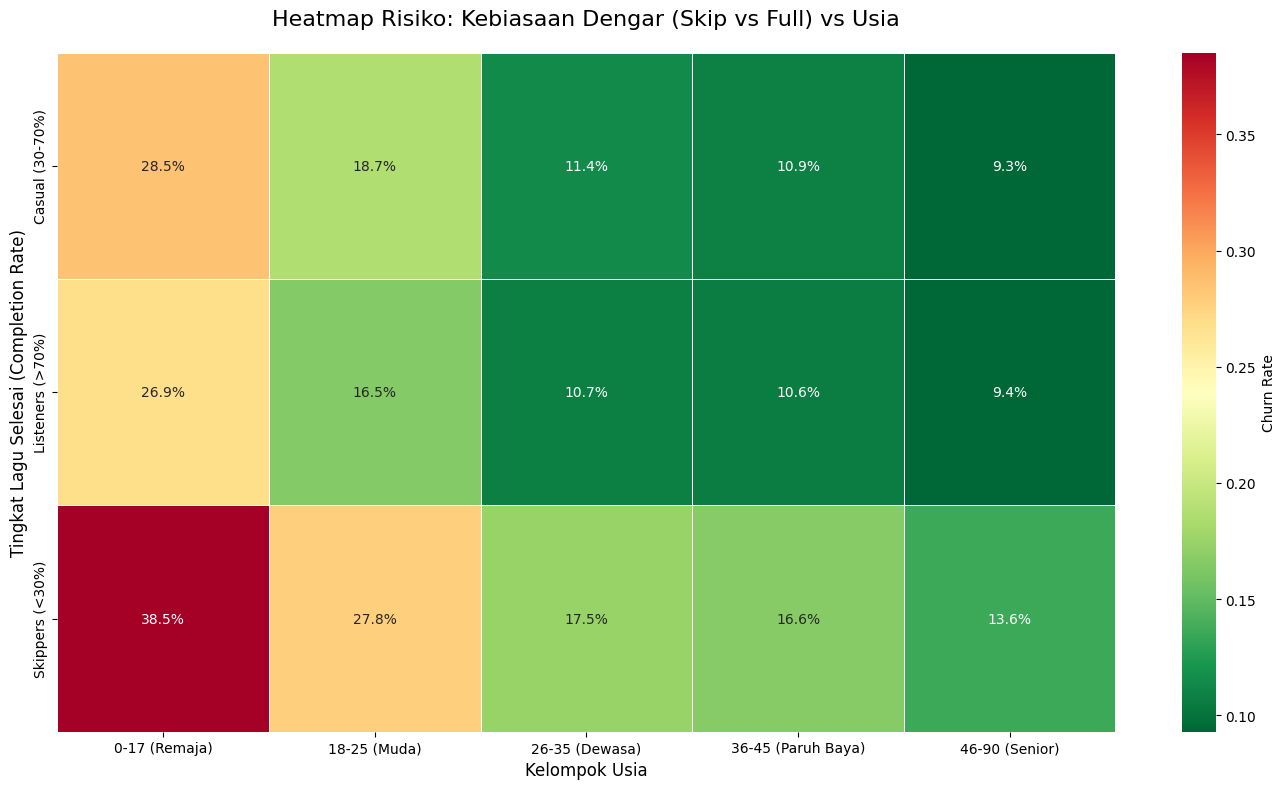

Analisis Logs Selesai!


In [18]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


print("Memulai Analisis User Logs x Demografi...")

# --- 2. JOIN DENGAN AGE GROUP & CHURN LABEL ---
print("Menggabungkan Logs dengan Demografi...")

# Asumsi: 'train_members_grouped' sudah ada dari cell sebelumnya
# Gunakan Inner Join karena kita hanya peduli user yang ada di Data Train (punya label churn)

# Filter Age Group yang valid
plot_data_logs = logs_df.filter(
    (F.col("is_churn").isNotNull()) & 
    (F.col("age_group") != "Unknown")
)

# --- 3. BINNING (PENGELOMPOKAN) FITUR NUMERIK ---
print("Melakukan Binning untuk Fitur Logs...")

# A. Binning Total Waktu Dengar (Total Secs)
# Angka ini bisa sangat besar, kita bagi jadi kategori
plot_data_logs = plot_data_logs.withColumn(
    "listening_time_group",
    F.when(F.col("total_secs_sum") < 3600, "Sangat Rendah (<1 Jam)") # < 1 jam total
     .when((F.col("total_secs_sum") >= 3600) & (F.col("total_secs_sum") < 36000), "Rendah (1-10 Jam)")
     .when((F.col("total_secs_sum") >= 36000) & (F.col("total_secs_sum") < 180000), "Sedang (10-50 Jam)")
     .otherwise("Tinggi (>50 Jam)")
)

# B. Binning Hari Aktif (Active Days)
plot_data_logs = plot_data_logs.withColumn(
    "active_days_group",
    F.when(F.col("total_active_days") <= 7, "Jarang (1-7 Hari)")
     .when((F.col("total_active_days") > 7) & (F.col("total_active_days") <= 30), "Kadang (8-30 Hari)")
     .when((F.col("total_active_days") > 30) & (F.col("total_active_days") <= 100), "Rutin (1-3 Bulan)")
     .otherwise("Sangat Aktif (>3 Bulan)")
)

# C. Binning Kualitas Dengar (Completion Rate)
# 0-0.3: Sering Skip, 0.7-1.0: Mendengar sampai habis
plot_data_logs = plot_data_logs.withColumn(
    "completion_habit",
    F.when(F.col("completion_rate") < 0.3, "Skippers (<30%)")
     .when((F.col("completion_rate") >= 0.3) & (F.col("completion_rate") < 0.7), "Casual (30-70%)")
     .otherwise("Listeners (>70%)")
)

# --- 4. VISUALISASI HEATMAP ---
# Pastikan fungsi create_churn_heatmap dari cell sebelumnya sudah didefinisikan

# Heatmap 1: Total Waktu Dengar vs Usia
create_churn_heatmap(
    plot_data_logs, 
    "listening_time_group", 
    "Heatmap Risiko: Total Waktu Dengar vs Kelompok Usia", 
    "heatmap_secs_age.png",
    "Total Waktu Mendengarkan"
)

# Heatmap 2: Frekuensi Aktif vs Usia
create_churn_heatmap(
    plot_data_logs, 
    "active_days_group", 
    "Heatmap Risiko: Keaktifan User vs Kelompok Usia", 
    "heatmap_activedays_age.png",
    "Jumlah Hari Aktif"
)

# Heatmap 3: Kebiasaan Dengar (Skip/Complete) vs Usia
create_churn_heatmap(
    plot_data_logs, 
    "completion_habit", 
    "Heatmap Risiko: Kebiasaan Dengar (Skip vs Full) vs Usia", 
    "heatmap_habit_age.png",
    "Tingkat Lagu Selesai (Completion Rate)"
)

print("Analisis Logs Selesai!")